# Un primer sobre grafos en Holoviews - carga de datos y primeras operaciones
Como una ayuda para el Challenge vamos a hacer una introducción rápida sobre cómo operar con grafos en Holoviews.

Visualizar y trabajar con gráficos de red es un problema común en muchas disciplinas diferentes. Holoviews simplifca algunos aspectos de esta tarea.

El elemento `Graph` se diferencia de otros `Elements` de HoloViews en que consta de varios subelementos. Los datos del propio elemento `Graph` son los bordes abstractos entre los nodos. De forma predeterminada, el elemento calculará automáticamente las posiciones x e y concretas de los nodos y las representará mediante un elemento `Nodes`, que se almacena en el gráfico. Los bordes abstractos y las posiciones concretas de los nodos son suficientes para representar el gráfico dibujando bordes de línea recta entre los nodos. Para proporcionar rutas de borde explícitas, también podemos declarar `EdgePaths`, proporcionando coordenadas explícitas para que siga cada borde.

Para resumir, un gráfico consta de tres componentes diferentes:

- El `Graph` en sí contiene los bordes abstractos almacenados como una tabla de índices de nodos.

- Los `Nodes` contienen  las posiciones x e y concretas de cada nodo junto con un índice de nodo. Los `Nodes` también pueden definir cualquier cantidad de dimensiones de valor, que se pueden revelar al pasar el mouse sobre los nodos o para colorear los nodos.

- `EdgePaths` se puede proporcionar opcionalmente para declarar rutas de nodo explícitas.

## Generando un `Graph`
Vamos a generar un objeto `Graph`, para lo cual vamos a trabajar con el dataset del Challenge 1 del VAST.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
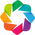

In [ ]:
import numpy as np
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
from bokeh.plotting import show
import requests
import json

hv.extension('bokeh')

defaults = dict(width=400, height=400)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

Generamos una función para leer el json:

In [ ]:
def read_json_file(filename):
    graph = json_graph.loads(open(filename))
    return graph

Los "edges" se llaman "links" en el json, pero igual los numeros no coinciden con lo que dice el doc. Importante que el grafo sea multigraph

In [ ]:
# Seteamos la URL for para JSON crudo en GitHub
url = 'https://github.com/gefero/FCEyN_Viz/raw/main/VAST2024/MC1/mc1.json'

# Hacemos un request
response = requests.get(url)

# Parseamos el json
data = json.loads(response.text)

In [ ]:
# Creamos un objeto Graph
G = nx.MultiGraph()

# Agregamos los nodos y un atributo
for node in data['nodes']:
  try:
    G.add_node(node['id'], n_type=node['type'],  country=node['country'])
  except:
    G.add_node(node['id'], n_type="sin dato")

# Agregamos los bordes con sus pesos y atributos
for edge in data['links']:
  try:
      G.add_edge(edge['source'], edge['target'],
               date = edge["_date_added"],
               source = edge["_raw_source"],
               algorithm = edge['_algorithm'],
               last_edit_by = edge['_last_edited_by'],
               last_edit_date =edge["_last_edited_date"],
               article_id = edge['_articleid'],
               e_type=edge['type'])
  except:
      G.add_edge(edge['source'], edge['target'],
               date = edge["_date_added"],
               source = 'sin dato',
               algorithm = 'sin dato',
               last_edit_by = 'sin dato',
               last_edit_date = 'sin dato',
               article_id = 'sin dato',
               e_type=edge['type'])

# Veamos alguna información de nodos y links

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 215
Number of edges: 16231


Como podemos ver, tenemos 215 nodos y 16231 links.

También se puede generar el objeto, llamando a networkx:

In [ ]:
d = nx.node_link_graph(data)

In [ ]:
print(f"Number of nodes: {d.number_of_nodes()}")
print(f"Number of edges: {d.number_of_edges()}")

Number of nodes: 215
Number of edges: 16231


Al llamar a `d.nodes()` tenemos el listado de nodos

In [ ]:
d.nodes()

NodeView(('Sanchez-Moreno', 'Frey Inc', 'Bowers Group', 'Franco-Stuart', 'Murphy, Marshall and Pope', 'Alvarez PLC', 'Wilcox-Nelson', 'Kelly-Smith', 'Jackson Inc', 'Clarke, Scott and Sloan', 'Olsen Group', 'Brown, Clarke and Martinez', 'Turner-Green', 'Spencer, Richards and Wilson', 'Harrell-Walters', 'Valdez, Dalton and Cook', 'Henderson, Hall and Lutz', 'Frank Group', 'Thompson-Padilla', 'Walker, Erickson and Blake', 'Smith, Smith and Barber', 'Wu-Hart', 'Horn and Sons', 'Clark-Leon', 'Rivas-Stevens', 'Taylor, Prince and Sherman', 'Ramos-Shelton', 'Martinez-Le', 'Roth, Logan and Moreno', 'Bishop-Hernandez', 'Harrington Inc', 'Vasquez, Chaney and Martinez', 'Moore-Simon', 'Flores Ltd', 'Watson-Gray', 'Collins, Johnson and Lloyd', 'York-Castillo', 'Hughes-Clark', 'Vargas-Jensen', 'Arellano Group', 'Murray, Friedman and Wall', 'Greer-Holder', 'Mann, Myers and Rivera', 'Glover, Moran and Johnson', 'Barnes and Sons', 'Phillips-Newton', 'Floyd-Cantu', 'Phelps, Brown and Wallace', 'Davis-Bo

In [ ]:
# Y podemos obtener las conexiones del nodo de "Sanchez-Moreno"
node_id = "Sanchez-Moreno"
connections = d.adj[node_id]

# Print the connections of the node
print(f"Connections of node {node_id}: {connections}")


Connections of node Sanchez-Moreno: {'Sustainable_nets': {0: {'type': 'Event.Invest', '_date_added': '2035-03-13T19:00:00', '_raw_source': 'Haacklee Herald', '_algorithm': 'BassLine', '_last_edited_by': 'Junior Shurdlu', '_last_edited_date': '2035-03-13T19:00:00', '_articleid': 'Sanchez-Moreno__0__0__Haacklee Herald'}, 1: {'type': 'Event.Invest', '_date_added': '2035-03-19T11:00:00', '_raw_source': 'Lomark Daily', '_algorithm': 'ShadGPT', '_last_edited_by': 'Olokun Daramola', '_last_edited_date': '2035-03-19T11:00:00', '_articleid': 'Sanchez-Moreno__0__0__Lomark Daily'}, 2: {'type': 'Event.Invest', '_date_added': '2035-04-10T12:00:00', '_raw_source': 'Haacklee Herald', '_algorithm': 'BassLine', '_last_edited_by': 'Jack Inch', '_last_edited_date': '2035-04-10T12:00:00', '_articleid': 'Sanchez-Moreno__0__0__Haacklee Herald'}, 3: {'type': 'Event.Invest', '_date_added': '2035-05-06T12:00:00', '_raw_source': 'Lomark Daily', '_algorithm': 'ShadGPT', '_last_edited_by': 'Niklaus Oberon', '_las

Las "id" de los nodos son string, esto puede traer problema. mapeo los ids a numeros:

In [ ]:
# Create a mapping from the original string IDs to new integer IDs
id_map = {id_str: i for i, id_str in enumerate(d.nodes())}
print(id_map)
# Rename the nodes in the graph using the integer IDs
d = nx.relabel_nodes(d, id_map)

# Now you can use the integer IDs to select nodes and edges, for example:
node_id = id_map["Rafael Sanchez"]
print(node_id)
adj_nodes = list(d.adj[node_id])
print(len(adj_nodes))

{'Sanchez-Moreno': 0, 'Frey Inc': 1, 'Bowers Group': 2, 'Franco-Stuart': 3, 'Murphy, Marshall and Pope': 4, 'Alvarez PLC': 5, 'Wilcox-Nelson': 6, 'Kelly-Smith': 7, 'Jackson Inc': 8, 'Clarke, Scott and Sloan': 9, 'Olsen Group': 10, 'Brown, Clarke and Martinez': 11, 'Turner-Green': 12, 'Spencer, Richards and Wilson': 13, 'Harrell-Walters': 14, 'Valdez, Dalton and Cook': 15, 'Henderson, Hall and Lutz': 16, 'Frank Group': 17, 'Thompson-Padilla': 18, 'Walker, Erickson and Blake': 19, 'Smith, Smith and Barber': 20, 'Wu-Hart': 21, 'Horn and Sons': 22, 'Clark-Leon': 23, 'Rivas-Stevens': 24, 'Taylor, Prince and Sherman': 25, 'Ramos-Shelton': 26, 'Martinez-Le': 27, 'Roth, Logan and Moreno': 28, 'Bishop-Hernandez': 29, 'Harrington Inc': 30, 'Vasquez, Chaney and Martinez': 31, 'Moore-Simon': 32, 'Flores Ltd': 33, 'Watson-Gray': 34, 'Collins, Johnson and Lloyd': 35, 'York-Castillo': 36, 'Hughes-Clark': 37, 'Vargas-Jensen': 38, 'Arellano Group': 39, 'Murray, Friedman and Wall': 40, 'Greer-Holder': 4

Grafico de un nodo y sus conexiones

In [ ]:
node_id = "Bowers Group"
selected_node = id_map[node_id]
print("selected node", selected_node)
# Get the IDs of the adjacent nodes
adj_nodes = list(d.adj[selected_node])
print(adj_nodes)
# Creamos un subgrafo del nodo seleccionado y de sus aledaños
subgraph = d.subgraph(list(adj_nodes) + [selected_node])

# Generamos las posiciones para mapear con un algoritmo de layout (spring)
pos = nx.spring_layout(subgraph, seed=42)

# Creamos y mostramos un Graph de Holoviews
hv_graph = hv.Graph.from_networkx(subgraph, pos)
show(hv.render(hv_graph))

selected node 2
[204, 142, 203, 202, 8, 140, 52, 111, 40, 44, 37, 59, 24, 33, 119, 121, 90, 79, 38, 70, 6, 31, 58, 36, 35, 99, 122, 87, 61, 11, 81, 205, 206]


In [ ]:
ids_to_look = ["Mar de la Vida OJSC", 979893388, "Oceanfront Oasis Inc Carriers", 8327, 979893388]

In [ ]:
def get_conexions(d, node_id="", id_map=id_map):
  node_id = id_map[node_id]
  adj_nodes = list(d.adj[node_id])
  connections = d.adj[node_id]
  return(connections)

In [ ]:
get_conexions(d=d, node_id=ids_to_look[4], id_map=id_map)

AdjacencyView({3172: {0: {'type': 'ownership', 'weight': 0.8363937, 'dataset': 'MC1'}}, 227: {0: {'type': 'partnership', 'weight': 0.9010467, 'dataset': 'MC1'}}, 206: {0: {'type': 'family_relationship', 'weight': 0.83718294, 'dataset': 'MC1'}}, 207: {0: {'type': 'family_relationship', 'weight': 0.8596191, 'dataset': 'MC1'}}, 719: {0: {'type': 'membership', 'weight': 0.8037018, 'dataset': 'MC1'}}, 336: {0: {'type': 'membership', 'weight': 0.84400237, 'dataset': 'MC1'}}, 893: {0: {'type': 'partnership', 'weight': 0.8669315, 'dataset': 'MC1'}}, 473: {0: {'type': 'partnership', 'weight': 0.8527762, 'dataset': 'MC1'}}, 896: {0: {'type': 'partnership', 'weight': 0.8544229, 'dataset': 'MC1'}}, 897: {0: {'type': 'ownership', 'weight': 0.8737811, 'dataset': 'MC1'}}, 250: {0: {'type': 'partnership', 'weight': 0.8380823, 'dataset': 'MC1'}}, 1065: {0: {'type': 'family_relationship', 'weight': 0.8509253, 'dataset': 'MC1'}}, 1083: {0: {'type': 'ownership', 'weight': 0.9245638, 'dataset': 'MC1'}}, 11

In [ ]:
kwargs = dict(width=1000, height=1000, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

graph = hv.Graph.from_networkx(G, nx.layout.spring_layout).opts(tools=['hover'])
show(hv.render(graph))